In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
np.random.seed(40)

In [2]:
#!pip install ucimlrepo

## Part A

In [6]:
def Minkowski_dist(v1,v2,p=2):
    total = 0
    for i in range(len(v1)):
        total += pow(abs(v1[i]-v2[i]),p)
    return pow(total,(1/p))

In [7]:
def accuracy(actual, predicted):
    correct = np.sum(actual == predicted)
    return correct/len(actual)

#### Precision, Recall, f1_score

In [96]:
def precision(actual,predicted):
    temp = confusion_matrix(actual,predicted)
    return temp[0,0]/(temp[0,0]+temp[1,0])
def recall(actual, predicted):
    temp = confusion_matrix(actual,predicted)
    return temp[0,0]/(temp[0,0]+temp[0,1])
def f1_score(actual, predicted):
    prec = precision(actual,predicted)
    recll = recall(actual,predicted)
    return 2*((prec*recll)/(prec+recll))

#### Confusion Matrix

In [97]:
def confusion_matrix(actual,predicted):
    tp, fn, tn, fp = 0, 0, 0, 0 
    for i in range(len(actual)):
        if actual[i] == 1: 
            if predicted[i] == 1:
                tp+=1
            else:
                fn+=1
        else:
            if predicted[i] == 0:
                tn+=1
            else:
                fp+=1
    matrix = np.array([[tp, fn],
                       [fp, tn]])
    return matrix

#### ROC

In [102]:
def plot_roc_curve(expected, probabilities):
    sorted_predictions_labels = sorted(zip(probabilities, expected), key=lambda x: x[0], reverse=True)
    sorted_prob = sorted(set(probabilities), reverse=True)  # eliminate duplicates
    total_positive = 0
    total_negative = 0
    TPR = [] 
    FPR = []
    best_threshold = 0 
    bestf1_score = 0
    
    for threshold in sorted_prob:
        TP_count = 0
        FP_count = 0
        labels = [] #labels for that threshold
        TP = []   #holds the labels that are true positive
        FP = []   #holds the labels that are false negative
        
        for prediction, true_label in sorted_predictions_labels:
            # label with new threshold
            if prediction >= threshold:
                predicted_label = 1
            else:
                predicted_label = 0
            # see if label is TP or FP
            if predicted_label == 1 and true_label == 1:
                TP_count += 1
            elif predicted_label == 1 and true_label == 0:
                FP_count += 1
                
            TP.append(TP_count) #store count instance of true postive 
            FP.append(FP_count)
            labels.append(predicted_label)  # labels for f1_score
        
        temp_f1_score = f1_score(expected, labels)
        
        if temp_f1_score > bestf1_score:
            f1_scores = temp_f1_score
            matrix = confusion_matrix(expected, labels) #puts confusion matrix
            total_positive = np.sum(matrix[:,0])   #collect the number of actual postives
            total_negative = np.sum(matrix[:,1])   #collect the number of actual negative
            best_threshold = threshold
            if total_positive == 0 or total_negative == 0:
                continue
            TPR = [y / total_positive for y in TP]    #divide the number of all elements by total postive for recall
            FPR = [x / total_negative for x in FP]
        
    plt.figure()
    plt.plot(FPR, TPR, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Threshold: {best_threshold})')
    plt.grid(True)
    plt.show()       

In [99]:
def auc_curve(expected, probabilities, threshold):
    sorted_predictions_labels = sorted(zip(probabilities, expected), key=lambda x: x[0], reverse=True)
    total_positive = 0
    total_negative = 0
    TPR = []
    FPR = []
    TP_count = 0
    FP_count = 0
    labels = []  # change labels to contain sequence of TP and FP
    TP = []   # holds the labels that are true positive
    FP = []   # holds the labels that are false negative
    
    # redo the roc curve but with the given threshold
    for prediction, true_label in sorted_predictions_labels:
        # label with new threshold
        if prediction >= threshold:
            predicted_label = 1
        else:
            predicted_label = 0
        # see if label is TP or FP
        if predicted_label == 1 and true_label == 1:
            TP_count += 1
            labels.append('TP')  # labels to help travel
        elif predicted_label == 1 and true_label == 0:
            FP_count += 1
            labels.append('FP')  # labels to help travel
                
        TP.append(TP_count)  # store count instance of true postive 
        FP.append(FP_count)
    
    # Ensure lengths of expected and labels are the same
    if len(expected) != len(labels):
        raise ValueError("Lengths of expected and labels lists do not match.")
    
    matrix = confusion_matrix(expected, labels)  # puts confusion matrix
    total_positive = np.sum(matrix[:, 0])   # collect the number of actual positives
    total_negative = np.sum(matrix[:, 1])   # collect the number of actual negatives
    TPR = [y / total_positive for y in TP]    # divide the number of all index by total postive for recall
    FPR = [x / total_negative for x in FP]
    
    # calculate AUC
    area = 0   # area to sum
    for i in range(len(labels)):
        if labels[i] == 'TP':
            height = TPR[i]
        elif labels[i] == 'FP':
            width = FPR[i]
            area += height * (width - FPR[i-1])
    
    return area

In [112]:
def precision_recall_curve(expected, probabilities):
     # Calculate Precision, Recall, and F1 score for different thresholds
    thresholds = np.linspace(0, 1, 100)
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in thresholds:
        # Predictions based on threshold
        predictions = (probabilities >= threshold).astype(int)

        # Calculate precision, recall, and F1 score using provided functions
        precisions.append(precision(expected, predictions))
        recalls.append(recall(expected, predictions))
        f1_scores.append(f1_score(expected, predictions))

    # Find the optimal threshold (max F1 score)
    optimal_threshold_index = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_threshold_index]

    # Plot Precision-Recall Curve
    plt.plot(recalls, precisions, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # Highlight the optimal threshold
    plt.plot(recalls[optimal_threshold_index], precisions[optimal_threshold_index], 'ro')
    plt.text(recalls[optimal_threshold_index], precisions[optimal_threshold_index], f'Threshold = {optimal_threshold:.2f}', fontsize=10)

    plt.grid(True)
    plt.show()

#### KNN

In [58]:
class KNN_Classifier():
    def __init__(self, n_neighbors=5, weights='uniform', p=2):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.p = p
        self.X_train = None
        self.Y_train = None
    
    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y
        
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        predictions = np.array([1 if prob >= threshold else 0 for prob in probabilities])
        return predictions
    
    def predict_proba(self, X):
        import numpy as np

        # Check what type of weight is being used
        if self.weights == 'uniform':
            weighted = 1
        elif self.weights == 'distance':
            weighted = -1
        else:
            print("Invalid weight")
            return None  # Return None if weights are invalid

        probabilities = []  # Store labels
        
        # Brute force checking distances of a sample point with the trained data
        for test_point in X:
            k_points = []  # store k points with label

            # Go through entries in the training set
            for point in range(len(self.X_train)):  
                # Finding distance
                distance =  Minkowski_dist(test_point, self.X_train[point], self.p)
                # Avoid 0 error
                if distance != 0:
                    distance = pow(distance, weighted)
                else:
                    distance = 0 

                # Comparing points
                if len(k_points) >= self.n_neighbors:
                    k_points.sort(key=lambda x: x[0], reverse=True)  # Sort by distance in descending order
                    # Compare stored distances and replace the larger distance if it's shorter in distance
                    if distance < k_points[0][0]:
                        k_points[0] = (distance, self.Y_train[point]) #label of distant point
                else:
                    k_points.append((distance, self.Y_train[point]))

            # Voting based on count or sum of accumulated weighted distance
            label_count = [0,0]
            count = [0,0]
            if self.weights == 'uniform':
                for points in k_points:
                    if points[1] == 1:
                        label_count[1] += 1
                    else:
                        label_count[0] += 1
            #sum distance
            elif self.weights == 'distance':
                for points in k_points:
                    if points[1] == 1:
                        label_count[1] += points[0]
                        count[1] += 1
                        
                    else:
                        label_count[0] += points[0]
                        count[0] += 1
                
            if self.weights == 'uniform':
                # Determine the majority class
                if label_count[1] > label_count[0]:
                    majority = label_count[1]
                else:
                    majority = self.n_neighbors - label_count[0] #avoid mislabeling as positive

                # Calculate probability of the majority class
                probability = majority / len(k_points)
            
            elif self.weights == 'distance':
                if label_count[1] >= label_count[0]:
                    probability = count[1] / self.n_neighbors
                else:
                    probability = count[0] / self.n_neighbors
                    
                    
            probabilities.append(probability)  # Add probability to list for labels

        return probabilities
    
    def get_params(self):
        return {'n_neighbors': self.n_neighbors, 'weights': self.weights, 'p': self.p}
    
    def set_params(self, **params):
        self.n_neighbors = params['n_neighbors']
        self.weights = params['weights']
        self.p = params['p']

#### Partition

In [11]:
def partition(feature_matrix, target, t, shuffle=True):
    if shuffle == True:
        shuffled_indices = np.random.permutation(len(target))
        test_size = int(len(target) * t)
        test_indices = shuffled_indices[:test_size]
        train_indices = shuffled_indices[test_size:]
        return feature_matrix[train_indices], feature_matrix[test_indices], target[train_indices], target[test_indices]
    else:
        test_size = int(len(target) * t)
        return feature_matrix[test_size:], feature_matrix[:test_size], target[test_size:], target[:test_size]

## Part B

In [12]:
df=pd.read_csv(r"https://github.com/YBI-Foundation/Dataset/raw/main/WhiteWineQuality.csv",sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
target = [] #list to hold the "bad" and "good"

#converting the quality into categorical
for i in range(len(df['quality'])):
    if df['quality'][i] <= 5:
        df.at[i, 'quality'] = 0
        target.append(0)
    else:
        df.at[i, 'quality'] = 1
        target.append(1)
        
#convert into a numpy array for testing
targetV = np.array(target)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [11]:
uniTable = df.describe()
#count number of distinct values in each column
distinct = df.nunique(axis=0)
distinct=distinct.to_frame().T #convert to row
distinct.rename(index={0: 'distinct'}, inplace=True)

#count number of nulls in each column
null_counts = df.isnull().sum().to_frame().T
null_counts.rename(index={0: 'null_count'}, inplace=True)

uniTable = pd.concat([uniTable, distinct, null_counts]) #merge the two rows with statistical table
uniTable

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000
distinct,68.000000,125.000000,87.000000,310.000000,160.000000,132.000000,251.000000,890.000000,103.000000,79.000000,103.000000,2.000000
null_count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


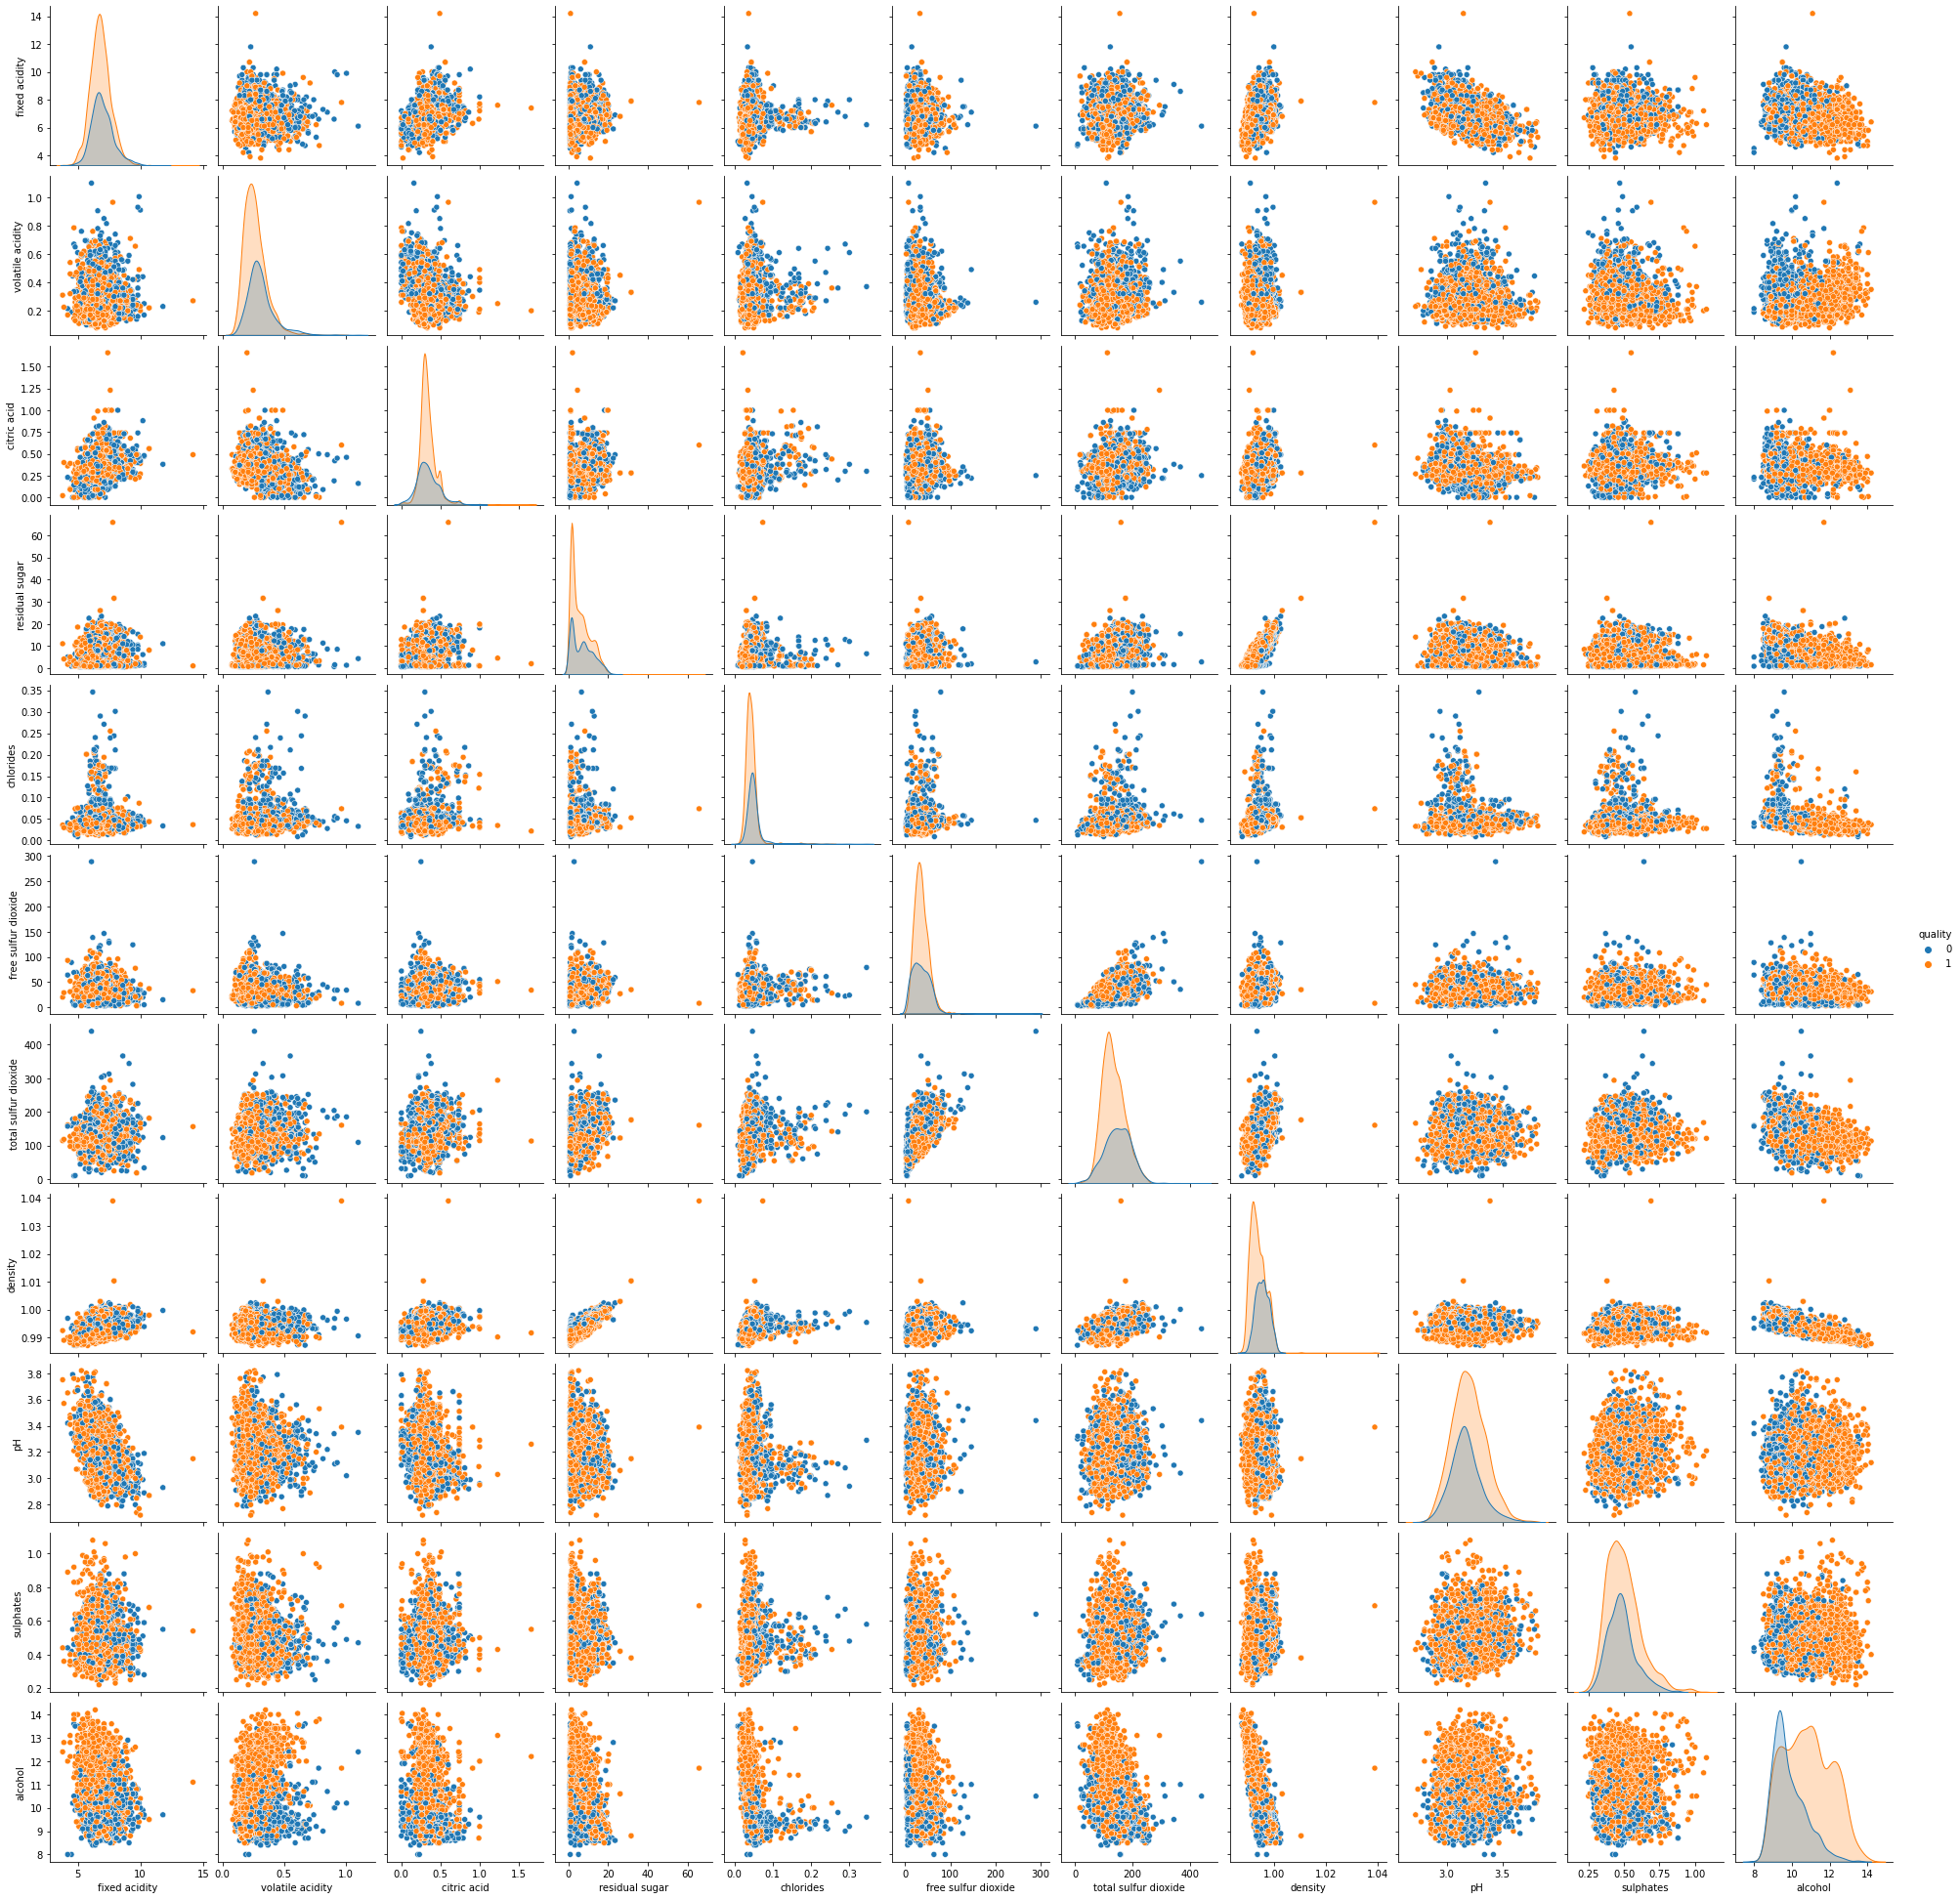

In [40]:
import seaborn as sns

sns.pairplot(df, hue="quality");

Features to drop:

- Residual Sugar - the other features highly correlated with the residual sugar, and it only affects taste
- Free Sulfur Dioxide - there is a linear relation with total sulfur dioxide. Dropped it to prevent multicollinearity
- Density - it has strong linear relationships with almost all features
- fixed acidity - it has a strong relationship with volatile acidity already

In [14]:
todrop = ['residual sugar', 'free sulfur dioxide', 'density', 'fixed acidity']
df.drop(columns = todrop, inplace=True)

In [13]:
df.shape

(4898, 8)

In [15]:
X = df.iloc[:, :6] #feature matrix
Y = df.iloc[:, 7]  #target

##### Testing

In [16]:
X_feature = X.to_numpy()

X_train, X_test, y_train, y_test = partition(X_feature,targetV,0.2)

### Models

In [44]:
obj = KNN_Classifier(5,'uniform',2)
obj.fit(X_train, y_train)
labels = obj.predict(X_test)
print("F1 score: ", f1_score(y_test, labels))
print("Accuracy: ", accuracy(y_test, labels))

F1 score:  0.7782608695652175
Accuracy:  0.6874361593462717


###### Testing different parameters

In [33]:
obj9 = KNN_Classifier(7,'uniform',2)
obj9.fit(X_train, y_train)
labels = obj9.predict(X_test)
print("F1 score: ", f1_score(y_test, labels))
print("Accuracy: ", accuracy(y_test, labels))

F1 score:  0.7788117394416606
Accuracy:  0.6843718079673136


For some reason I keep getting the same f1_score

##### Scalar and inverse distance

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)


obj2 = KNN_Classifier()
obj2.fit(scaled_train, y_train)
labels2 = obj2.predict(scaled_test)
print("F1 score: ", f1_score(y_test, labels2)) 
print("Accuracy: ", accuracy(y_test, labels2))

F1 score:  0.8203991130820399
Accuracy:  0.7517875383043923


Standardizing the data contains a better f1_score and is more accurate. For the remainder of the project it is best to use the standardized data.

In [61]:
obj3 = KNN_Classifier(5,'distance',2)
obj3.fit(X_train, y_train)
labels3 = obj3.predict(X_test)
labels3
print("F1 score: ", f1_score(y_test, labels3)) 
print("Accuracy: ", accuracy(y_test, labels3))

F1 score:  0.7795128044971894
Accuracy:  0.6394279877425945


###### Logistic 

In [72]:
from sklearn.linear_model import LogisticRegression

obj4 = LogisticRegression(penalty='l2', max_iter=3000)
obj4.fit(X_train,y_train)
labels4 = obj4.predict(X_test)
print("F1 score: ", f1_score(y_test, labels4)) 
print("Accuracy: ", accuracy(y_test, labels4))

F1 score:  0.8078175895765473
Accuracy:  0.6986721144024515


In [73]:
obj5 = LogisticRegression(penalty='l2',max_iter=3000)
obj5.fit(scaled_train, y_train)
labels5 = obj5.predict(scaled_test)
print("F1 score: ", f1_score(y_test, labels5)) 
print("Accuracy: ", accuracy(y_test, labels5))

F1 score:  0.8037135278514589
Accuracy:  0.6976506639427987


Use standardize because better accuracy and f1_score; however, the difference isn't so big so using the unscaled data is fine.

## Part C

#### K-Fold

In [92]:
from sklearn.model_selection import KFold

def sFold(folds,data,labels,model,model_args,error_function):
    kf = KFold(n_splits=folds)
    expected_label = []
    predicted_label = []
    
    for train_index, test_index in kf.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        model.set_params(**model_args)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        expected_label.extend(y_test)
        predicted_label.extend(y_pred)
    print(model.get_params())
        
    average_error = error_function(expected_label, predicted_label)
    return expected_label,predicted_label,average_error

In [26]:
import pandas as pd

df_fold = pd.DataFrame([], columns=['Experiment_Name', 'k', 'distance', 'weights', 'Average_F1'])
k_neighbor = [1, 5, 9, 11]
weights = ['uniform', 'distance']
distance = [1, 2]
obj = KNN_Classifier()

data_to_append = []
labels_to_store = []

for k in k_neighbor:
    for weight in weights:
        for p in distance:      
            params = {'n_neighbors': k, 'weights': weight, 'p': p}
            expected, predicted, average_error = sFold(3, X_train, y_train, obj, params, f1_score) 
            df_fold=df_fold.append({'Experiment_Name': 'KNN', 'k': k, 'distance': p, 'weights': weight, 'Average_F1': average_error}, ignore_index =True)
            labels_to_store.append((expected, predicted))     
df_fold

C:\Users\justi\AppData\Local\Temp\ipykernel_1524\2533586527.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fold=df_fold.append({'Experiment_Name': 'KNN', 'k': k, 'distance': p, 'weights': weight, 'Average_F1': average_error}, ignore_index =True)
C:\Users\justi\AppData\Local\Temp\ipykernel_1524\2533586527.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fold=df_fold.append({'Experiment_Name': 'KNN', 'k': k, 'distance': p, 'weights': weight, 'Average_F1': average_error}, ignore_index =True)
C:\Users\justi\AppData\Local\Temp\ipykernel_1524\2533586527.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fold=df_fold.append({'Experiment_Name': 'KNN', 'k': k, 'distance': p, 'weights': weight, 'Average_F1': aver

,Experiment_Name,k,distance,weights,Average_F1
0,KNN,1,1,uniform,0.799142
1,KNN,1,2,uniform,0.799142
2,KNN,1,1,distance,0.799142
3,KNN,1,2,distance,0.799142
4,KNN,5,1,uniform,0.799142
5,KNN,5,2,uniform,0.799142
6,KNN,5,1,distance,0.799142
7,KNN,5,2,distance,0.799142
8,KNN,9,1,uniform,0.799142
9,KNN,9,2,uniform,0.799142


Computation requires too much time to generate the K folds for KNN (Guessed which KNN would perform well (K=9,11))

In [95]:
df_fold3 = pd.DataFrame([], columns=['Experiment_Name', 'k', 'distance', 'weights', 'Average_F1'])
k_neighbor = [11]
weights = ['uniform']
distance = [2]
obj = KNN_Classifier()

data_to_append = []
labels_to_store = []

for k in k_neighbor:
    for weight in weights:
        for p in distance:      
            params = {'n_neighbors': k, 'weights': weight, 'p': p}
            expected, predicted, average_error = sFold(3, X_train, y_train, obj, params, f1_score) 
            df_fold3=df_fold3.append({'Experiment_Name': 'KNN', 'k': k, 'distance': p, 'weights': weight, 'Average_F1': average_error}, ignore_index =True)
            labels_to_store.append((expected, predicted))     
df_fold3

{'n_neighbors': 11, 'weights': 'uniform', 'p': 2}


C:\Users\justi\AppData\Local\Temp\ipykernel_3252\2047661383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fold3=df_fold3.append({'Experiment_Name': 'KNN', 'k': k, 'distance': p, 'weights': weight, 'Average_F1': average_error}, ignore_index =True)


,Experiment_Name,k,distance,weights,Average_F1
0,KNN,11,2,uniform,0.766313


In [77]:
df_fold2 = pd.DataFrame([], columns=['Experiment_Name', 'Penalty', 'Average_F1'])
penalties = [0, 0.5, 1]
obj2 = LogisticRegression(solver='saga', max_iter=5000)
label_tuple = []

for i in penalties:
    params = {'penalty': 'elasticnet', 'l1_ratio': i}
    expected, predicted, average_error = sFold(3, X_feature, targetV, obj2, params, f1_score) 
    df_fold2 = df_fold2.append({'Experiment_Name': 'Logistic Regression', 'Penalty': i, 'Average_F1': average_error}, ignore_index=True)
    label_tuple.append((expected,predicted))
df_fold2

C:\Users\justi\code\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\justi\code\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\justi\code\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0, 'max_iter': 5000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'elasticnet', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\Users\justi\AppData\Local\Temp\ipykernel_3252\1539696089.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fold2 = df_fold2.append({'Experiment_Name': 'Logistic Regression', 'Penalty': i, 'Average_F1': average_error}, ignore_index=True)
C:\Users\justi\code\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\justi\code\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\justi\code\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\justi\AppData\Local\Temp\ipykernel_3252\1539696089.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pan

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.5, 'max_iter': 5000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'elasticnet', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\Users\justi\code\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\justi\code\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 1, 'max_iter': 5000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'elasticnet', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\Users\justi\code\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\justi\AppData\Local\Temp\ipykernel_3252\1539696089.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fold2 = df_fold2.append({'Experiment_Name': 'Logistic Regression', 'Penalty': i, 'Average_F1': average_error}, ignore_index=True)


,Experiment_Name,Penalty,Average_F1
0,Logistic Regression,0,0.797908
1,Logistic Regression,0.5,0.797552
2,Logistic Regression,1,0.797196


0 represents a l1 penalty, 1 represents a l2 penalty and 0.5 represent a equal mix of the two. 
Goal was to determine if lasso (l1) or ridge (l2) will be better for modeling the training set.

###### Model to rerun

In [100]:
obj_final = LogisticRegression(penalty="elasticnet", solver='saga', l1_ratio=1, max_iter=10000)
obj_final.fit(X_train, y_train)
label = obj_final.predict(X_test)

The logistic regression model with penalty 1 is the best model to rerun due to the model having the greater f1 score.

In [80]:
#label_tuple = labels_to_store[]
print("precision",precision(y_test,label))
print("recall ",recall(y_test,label))
print("f1_score ",f1_score(y_test,label))
a1 = accuracy(y_test,label)
print("Accuracy ",a1)

precision 0.6827438370846731
recall  0.98
f1_score  0.8048010107391029
Accuracy  0.6843718079673136


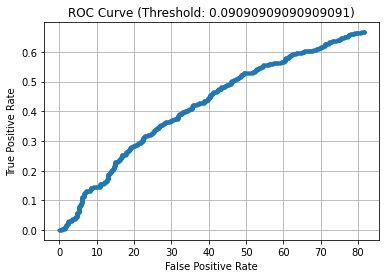

In [103]:
prob = obj.predict_proba(X_test)
plot_roc_curve(y_test, prob)

In [115]:
area = auc_curve(y_test, prob, 0.09)

In [116]:
print(area)

0.629913490764555


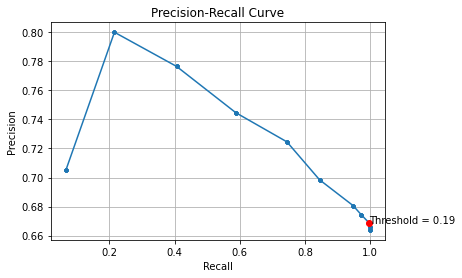

In [113]:
 precision_recall_curve(y_test, prob)

In [50]:
import math

left_CI = a1 - 1.96*math.sqrt((a1*(1-a1))/len(y_test))
right_CI = a1 + 1.96*math.sqrt((a1*(1-a1))/len(y_test))

print((left_CI, right_CI))

(0.6385292409926131, 0.6975279602331275)


### Summary and Methods

1) In this project, a brute force approach to K-nearest neighbor was made from scratch. Different approaches were used to choose a good model such as normalizing the data, and inverse the distance to weight distance. After which a new classifier was introduced logistic regression to compare classification between KNN and logistic regression. A k-fold is introduced to improve the model and help decide an appropiate model that best perform. Performance checks were than made to see how will the model performed with the data.

2) The dataset contained various features describing a record of white wine. The features contained certain types of different chemicals that is composed into the wine such as sugar, acid, chlorides and sulfur dioxide along with different other properties of the wine such as the ph level and the density. The target is the quality of the wine as the goal is to try to determine how much of each feature contributes to the quality of the wine. Selected features were all fed to the algorithm to decide which boundry does the feature belong to.

3) The training time for the KNN_classifier and logistic regression was realtively fast because it stores large amounts of data into a object. The prediction time for the KNN_classifier is longer since the brute force approach to the KNN takes a tremendous amount of time and is not nesccarily the most efficient method since it tries to use a large portion of points and measure the distance between that and K multiple points. Larger K neighbors like 9 and 11 were used to gain more information about the classes surrounding the instant of the sample and euclidean distance for more accurate distance between points. For logistic regression, the ridge regularization is used to prevent overfitting.

### Results

#### A

In [119]:
data = {
    'K': [],
    'Distant': [],
    'F1_Score': []
}

# Iterate over different values of K and distance metrics
max_accuracy_index = -1
max_accuracy = float('-inf')

for k in [1, 5, 9, 11]:
    for distance_metric in [1, 2]:
        # Create and fit KNN classifier
        obj11 = KNN_Classifier(k, 'uniform', distance_metric)
        obj11.fit(X_train, y_train)
        
        # Predict labels
        labels = obj11.predict(X_test)
        
        # Calculate accuracy
        a11 = f1_score(y_test, labels)
        
        # Append data to the dictionary
        data['K'].append(k)
        data['Distant'].append(distance_metric)
        data['F1_Score'].append(a11)
        
        # Update maximum accuracy info
        if a11 > max_accuracy:
            max_accuracy = a11
            max_accuracy_index = len(data['K']) - 1

# Print collected data
for i in range(len(data['K'])):
    if i == max_accuracy_index:
        print("\033[1mK:", data['K'][i], "| Distant:", data['Distant'][i], "| F1_Score:", data['F1_Score'][i], "\033[0m")
    else:
        print("K:", data['K'][i], "| Distant:", data['Distant'][i], "| F1_Score:", data['F1_Score'][i])


K: 1 | Distant: 1 | F1_Score: 0.8045454545454546
K: 1 | Distant: 2 | F1_Score: 0.8097043214556482 
K: 5 | Distant: 1 | F1_Score: 0.7639796659404502
K: 5 | Distant: 2 | F1_Score: 0.7782608695652175
K: 9 | Distant: 1 | F1_Score: 0.7884344146685472
K: 9 | Distant: 2 | F1_Score: 0.7895480225988699
K: 11 | Distant: 1 | F1_Score: 0.7894371091035441
K: 11 | Distant: 2 | F1_Score: 0.7803508771929824


The smaller the K, the comparision in performance to higher levels of K does better. This might be due to the model being overfit since it is learning from one point and not multiple. This might lead to ridget boundaries

#### B

I think the overall model that I chose (logistic regression with l2 penalty) did fairly okay because it's accuracy, f1_score, and recall were high indicating that it classified the wine close to the actual labels in the dataset. However, the AUC of is a bit underwhelming since it is under 0.7. This shows that the model can guess the class of the label most of the time but it might be a bit random.

#### C

(Model was already ran)
The average f1_score led to a good performance being that it showed that my model had a high f1_score. The recall was really good since it was close to 1. Accuracy, ROC, and precision weren't as great because of how it measured close to be okay, close to 0.7.

#### D

I think my overall model did fine. The l2 penalty did rather well being it had the highest f1_score though I thought the model might have a good AUC being it had high recall. As for the KNN iteslf, I think the KNN came rather close to performing as well with the logistic model because of how close the f1_scores are. However, if I could, can properly implement a weighted distance to see if a KNN with big enough neighbors can have better performance than a logistic model, since my weighted distance didn't do that well when it was unweighted.